In [1]:
import pandas as pd
import numpy as np
import yfinance as yfin
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from datetime import datetime



def previsao(ticket):
    days = 10

    data = yfin.download(tickers=ticket, start=datetime(2005, 1, 1), end=datetime(2021, 1, 1))

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

    x_train = []
    y_train = []

    for x in range(days, len(scaled_data)):
        x_train.append(scaled_data[x-days:x, 0])
        y_train.append(scaled_data[x, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=25, batch_size=32)

    test_data = yfin.download(tickers=ticket, start=datetime(2021, 1, 1), end=datetime.now())
    actual_price = test_data['Adj Close'].values

    total_dataset = pd.concat((data['Adj Close'], test_data['Adj Close']), axis=0)
    model_inputs = total_dataset[len(total_dataset) - len(test_data) - days:].values
    model_inputs = model_inputs.reshape(-1, 1)
    model_inputs = scaler.transform(model_inputs)

    x_test = []

    for x in range(days, len(model_inputs)):
        x_test.append(model_inputs[x-days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    predicted_prices = model.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    plt.plot(data['Adj Close'], color='blue', label='Preços de Treinamento')
    plt.plot(test_data.index, actual_price, color='black', label=f'Preços Reais da {ticket}')
    plt.plot(test_data.index, predicted_prices, color='green', label=f'Preços Previstos da {ticket}')
    plt.title(f'{ticket} - Janela: {days} dias')
    plt.xlabel('Tempo')
    plt.ylabel(f'{ticket}')
    plt.legend()
    plt.show()

    real_data = model_inputs[-days:]
    real_data = np.array(real_data).reshape(1, -1, 1)

    if real_data.shape[1] == days:
        prediction = model.predict(real_data)
        prediction = scaler.inverse_transform(prediction)
        print(f'Previsão: {prediction}')
    else:
        print(f'Não há dados suficientes para previsão com a janela de {days} dias.')

    predicted_prices = predicted_prices[:-1]
    min_len = min(len(actual_price), len(predicted_prices))
    actual_price = actual_price[:min_len]
    predicted_prices = predicted_prices[:min_len]

    mae = mean_absolute_error(actual_price, predicted_prices)
    mse = mean_squared_error(actual_price, predicted_prices)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_price, predicted_prices)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")


Bem vindo ao recomendador de investimentos!
Escolha uma criptomoeda: 
1- BTC-USD
2-ETH-USD
3-USDT-USD


[*********************100%%**********************]  1 of 1 completed
c:\Users\leona\anaconda3\envs\ambiente\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0163
Epoch 2/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014
Epoch 3/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 4/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 5/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015
Epoch 6/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 7/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 8/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.4811e-04
Epoch 9/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 10/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.7163e-04
Epoch 11/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2023e-04
Epoch 12/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.1608e-04
Epoch 13/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.1152e-04
Epoch 14/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.9989e-04
Epoch 15/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/

[*********************100%%**********************]  1 of 1 completed


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


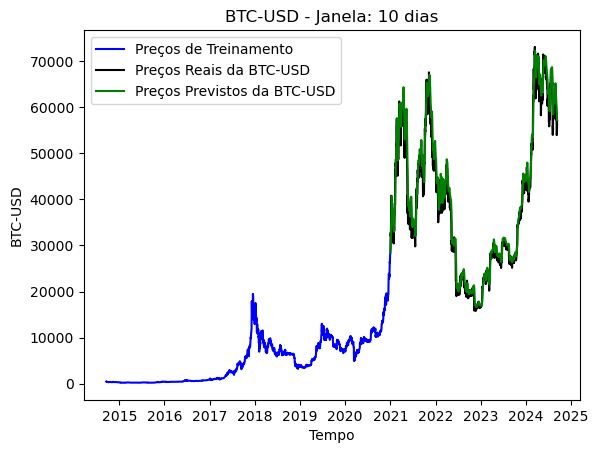

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Previsão: [[57364.34]]
MAE: 1746.025390625
MSE: 5662581.942806872
RMSE: 2379.6180245591668
R2: 0.9762947203310411


In [2]:
print("Bem vindo ao recomendador de investimentos!")
print("Escolha uma criptomoeda: ")
print("1- BTC-USD\n2-ETH-USD\n3-USDT-USD")
escolha = input()
if escolha == '1':
    ticket = "BTC-USD"
elif escolha == '2':
    ticket = "ETH-USD"
elif escolha == '3':
    ticket = "USDT-USD"
if ticket:
    previsao(ticket=ticket)